<a href="https://colab.research.google.com/github/stash95/stepik_ML_project/blob/main/EDA_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ данных и начало машинного обучения



**Цели на буткемп:**

* провести разведочный анализ данных

* построить и проинтерпретировать ML-модель

* обернуть ее в интерактивный веб-сервис

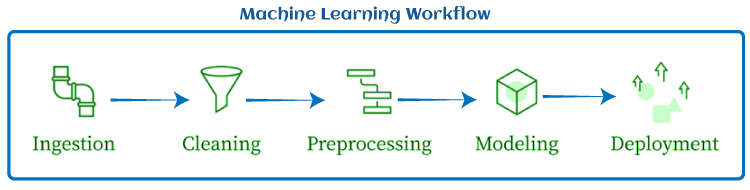

**Цели на сегодня:**

* понять влияние различных факторов (экономических, личных, социальных) на оценки студентов на экзаменах

* научиться делать разведочный анализ данных

* построить первую модель машинного обучения

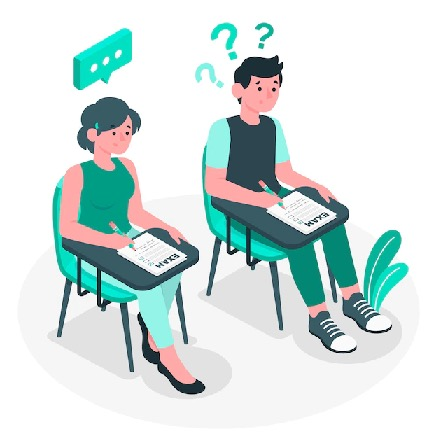

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/students.csv")

## Описание данных

* gender - пол студента
* parental level of education - уровень образования родителей
* lunch - вид обеда студента
* class group - в какой группе обучался студент
* test preparation course - проходил ли студент курс для подготовки к экзаменам
* math score - балл за экзамен по математике
* reading score - балл за экзамен по чтению
* writing score (target) - балл за экзамен по письму, целевая переменная

In [ ]:
df.head(10)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,class_group
0,female,NaN,standard,none,72.0,72.0,74,group B
1,female,some college,standard,completed,69.0,90.0,88,group C
2,female,master's degree,standard,none,90.0,95.0,93,group B
3,male,associate's degree,free/reduced,none,47.0,57.0,44,group A
4,male,some college,standard,none,76.0,78.0,75,group C
5,female,associate's degree,standard,none,71.0,83.0,78,group B
6,female,some college,standard,completed,88.0,95.0,92,group B
7,male,some college,free/reduced,none,40.0,43.0,39,group B
8,male,high school,free/reduced,completed,64.0,64.0,67,group D
9,NaN,high school,free/reduced,none,38.0,60.0,50,group B


## Исследование данных

Размер датасета

In [ ]:
df.shape

(1000, 8)

Информация о типах данных и пропусках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       923 non-null    object 
 1   parental level of education  924 non-null    object 
 2   lunch                        1000 non-null   object 
 3   test preparation course      1000 non-null   object 
 4   math score                   952 non-null    float64
 5   reading score                990 non-null    float64
 6   writing score                1000 non-null   int64  
 7   class_group                  1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


Основные числовые характеристики

In [ ]:
df.describe()

,math score,reading score,writing score
count,952.000000,990.000000,1000.000000
mean,65.452731,69.202020,68.054000
std,16.153180,14.638951,15.195657
min,-5.000000,17.000000,10.000000
25%,56.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,76.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [ ]:
df.describe(include='object')

,gender,parental level of education,lunch,test preparation course,class_group
count,923,924,1000,1000,1000
unique,2,6,3,2,5
top,female,associate's degree,standard,none,group C
freq,470,212,630,642,319


## Однофакторный анализ

## Math score, reading score

In [ ]:
df[['math score','reading score', 'writing score']].describe()

,math score,reading score,writing score
count,952.000000,990.000000,1000.000000
mean,65.452731,69.202020,68.054000
std,16.153180,14.638951,15.195657
min,-5.000000,17.000000,10.000000
25%,56.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,76.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


* в оценках есть пропуски

* есть некорректные оценки (меньше 0)

Посмотрим на распределение оценок

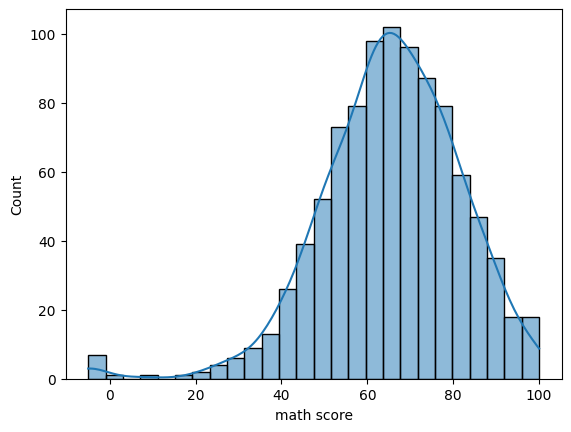

In [ ]:
sns.histplot(df['math score'], kde=True)
plt.show()

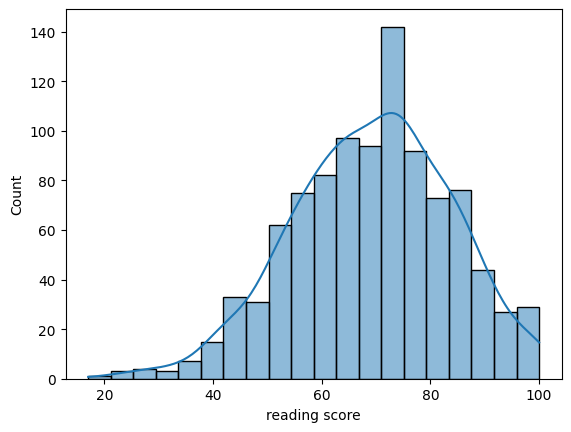

In [ ]:
sns.histplot(df['reading score'], kde=True)
plt.show()

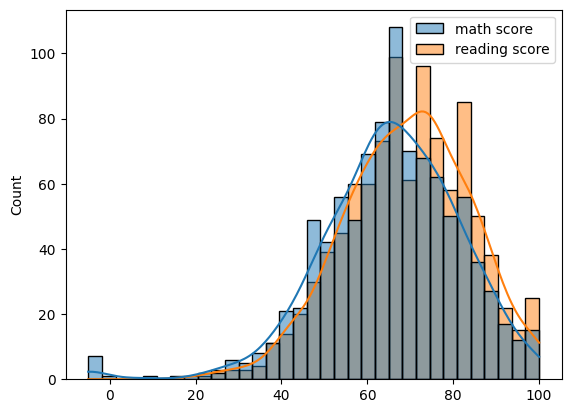

In [ ]:
sns.histplot(df[['math score','reading score']], kde=True)
plt.show()

* заменим отрицательные значения балла на 0

* заменим пропуски на средние значения

In [ ]:
df['math score'] = np.where(df['math score'] < 0, 0, df['math score'])

df['math score'].min()

0.0

In [ ]:
mean = df['math score'].mean()

df['math score'].fillna(mean, inplace=True)

In [ ]:
mean = df['reading score'].mean()

df['reading score'].fillna(mean, inplace=True)

Есть ли связь между баллами студента за разные экзамены?

Построим матрицу корреляций для ответа на этот вопрос.

Коэффициент корреляции $\rho$ - это мера взаимосвязи между двумя величинами (корреляция Пирсона - мера линейной зависимости).

$-1 \leq \rho \leq 1$

Чем больше **по модулю** коэффициент корреляции $\rho$ - тем больше взаимосвязь между величинами.

<Axes: >

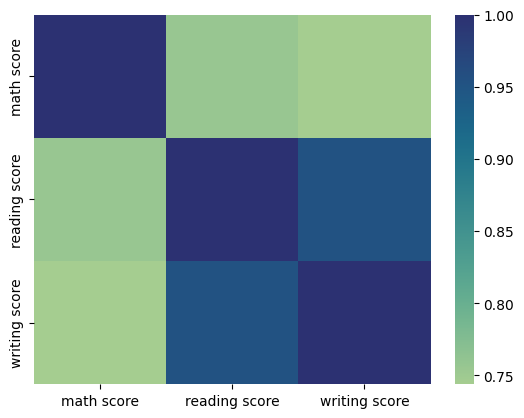

In [ ]:
corr = df[['math score','reading score', 'writing score']].corr()

sns.heatmap(corr, cmap="crest")

Зависимость есть!

### Gender - пол

In [ ]:
df['gender'].value_counts(dropna=False)

female    470
male      453
NaN        77
Name: gender, dtype: int64

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

In [ ]:
df['gender'].value_counts(dropna=False, normalize=True)

female    0.470
male      0.453
NaN       0.077
Name: gender, dtype: float64

In [ ]:
df['gender'].fillna("unknown", inplace=True)

df['gender'].value_counts(dropna=False)

female     470
male       453
unknown     77
Name: gender, dtype: int64

Посмотрим простую гистограмму по полу

<Axes: xlabel='gender', ylabel='count'>

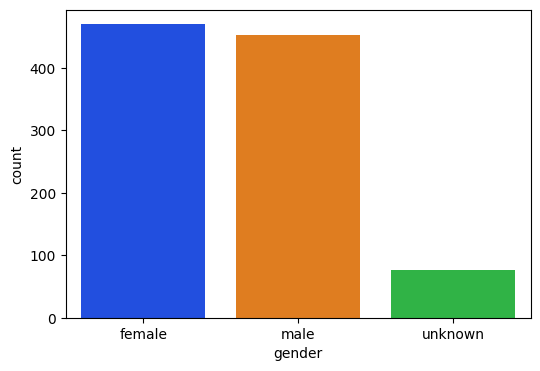

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(x='gender', data = df, palette='bright')

Визуализируем связь среднего балла по математике в зависимости от пола. На гистограмме изображены для каждой категории:

* средний балл
* доверительный интервал для среднего с вероятностью 95%

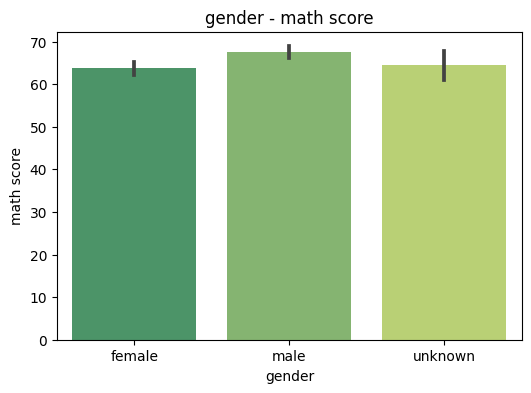

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='gender', y='math score', data = df, palette='summer')
plt.title('gender - math score')
plt.show()

In [ ]:
df[df.gender == 'female']['math score'].mean(), df[df.gender == 'male']['math score'].mean()

(63.68895941355265, 67.53361344537815)

Можно вычислять errorbars (интервалы) и [другими способами](https://seaborn.pydata.org/tutorial/error_bars.html):


eb.svg

Нарисуем errorbar, используя standard deviation (обычное стандартное отклонение)

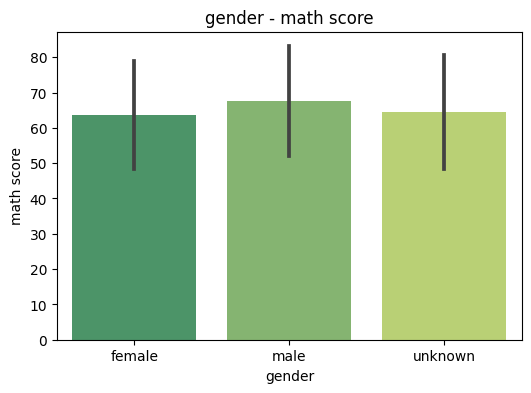

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='gender', y='math score', errorbar = "sd", data = df, palette='summer')
plt.title('gender - math score')
plt.show()

### Lunch - тип обеда

Посмотрим, как влияет тип обеда (lunch) на результаты студентов

In [ ]:
df['lunch'].value_counts()

standard        630
free/reduced    350
standart         20
Name: lunch, dtype: int64

Видим ошибочное написание категории 'standard'. Исправим ошибку.

In [ ]:
df['lunch'] = df['lunch'].replace('standart', 'standard')

In [ ]:
df['lunch'].value_counts()

standard        650
free/reduced    350
Name: lunch, dtype: int64

Посмотрим как влияет тип ланча на балл по математике

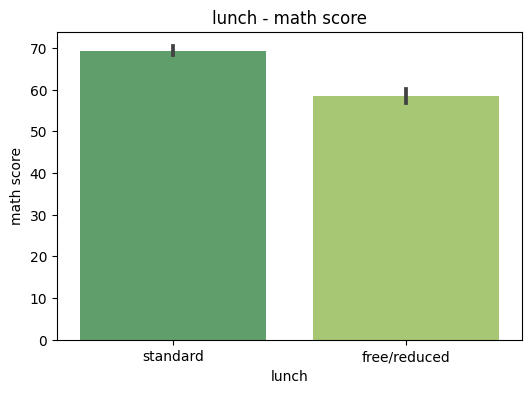

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='lunch', y='math score', data = df, palette='summer')
plt.title('lunch - math score')
plt.show()

Углубимся в разведочный анализ, и посмотрим как влияет связка факторов на балл:

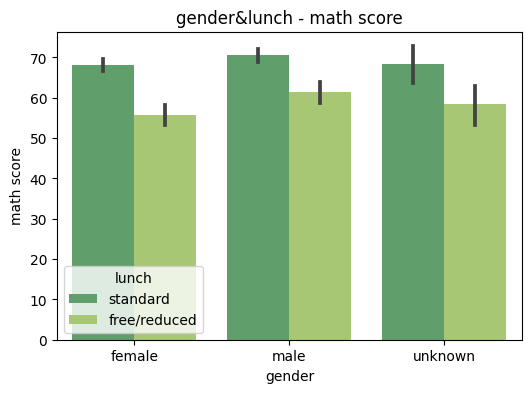

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='gender', y='math score', hue='lunch', data = df, palette='summer')
plt.title('gender&lunch - math score')
plt.show()

Ещё один полезный вид визуализации - ящик с усами.

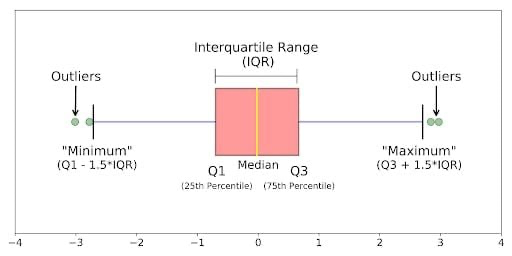

Посмотрим на ящик с усами, отображающий распределение балла по математике в зависимости от типа обеда (lunch).

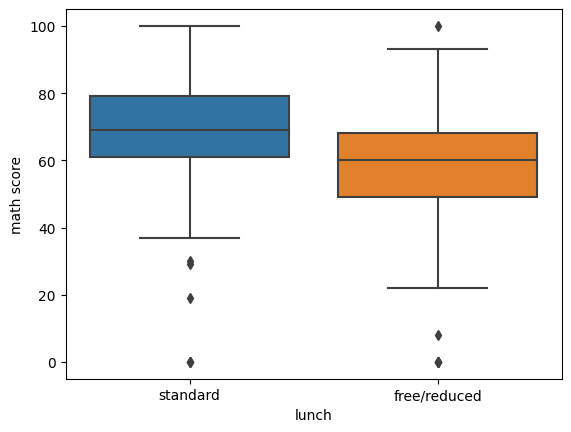

In [ ]:
sns.boxplot(x="lunch", y="math score", data=df)
plt.show()

## Бинаризация оценок

Будем считать, что студент сдал экзамен, если он набрал за него **не менее 50 баллов**.

In [ ]:
passmark = 50

Создадим столбцы `math success`, `reading success`, `writing success`, `overall success` где поставим:

* 1 - если студент сдал экзамен
* 0 - если на сдал

In [ ]:
df['math success'] = df['math score'].apply(lambda x: 1 if x >= passmark else 0)
df['reading success'] = df['reading score'].apply(lambda x: 1 if x >= passmark else 0)
df['writing success'] = df['writing score'].apply(lambda x: 1 if x >= passmark else 0)

df['overall success'] = (df['math success'] + df['reading success'] + df['writing success'] == 3)

In [ ]:
df[['math success', 'reading success', 'writing success', 'overall success']].sample(10)

,math success,reading success,writing success,overall success
802,1,1,1,True
627,1,0,0,False
486,1,0,1,False
417,1,1,1,True
53,1,1,1,True
431,1,1,1,True
156,1,1,1,True
468,1,1,1,True
564,0,1,0,False
864,1,1,1,True


In [ ]:
len(df[df['overall success'] == 0]) / len(df)

0.192

## Parental level of education - уровень образования родителей

In [ ]:
df['parental level of education'].value_counts()

associate's degree    212
some college          209
high school           180
some high school      159
bachelor's degree     109
master's degree        55
Name: parental level of education, dtype: int64

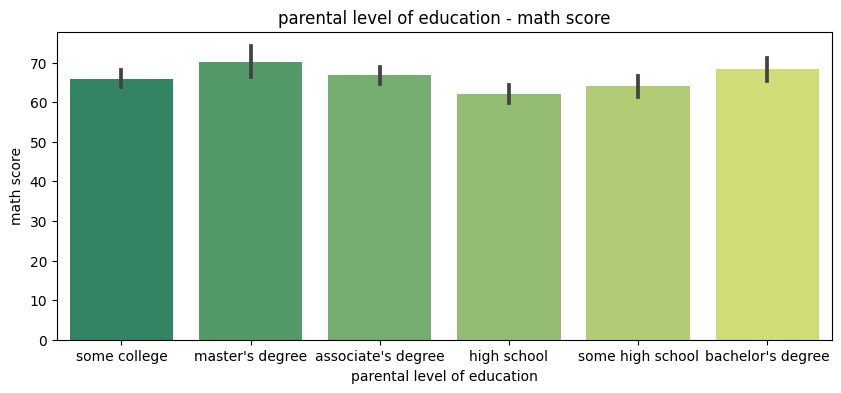

In [ ]:
plt.figure(figsize=(10,4))

sns.barplot(x='parental level of education', y='math score', data = df, palette='summer')
plt.title('parental level of education - math score')
plt.show()

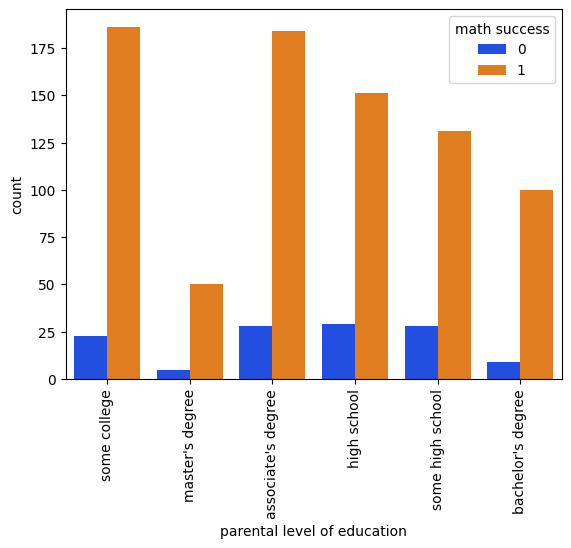

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='math success', palette='bright')

_ = plt.setp(p.get_xticklabels(), rotation=90)

## Test preparation course - курсы для подготовки к экзаменам

In [ ]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

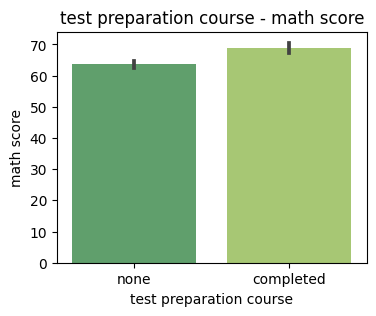

In [ ]:
plt.figure(figsize=(4,3))

sns.barplot(x='test preparation course', y='math score', data = df, palette='summer')
plt.title('test preparation course - math score')
plt.show()

<Axes: xlabel='test preparation course', ylabel='count'>

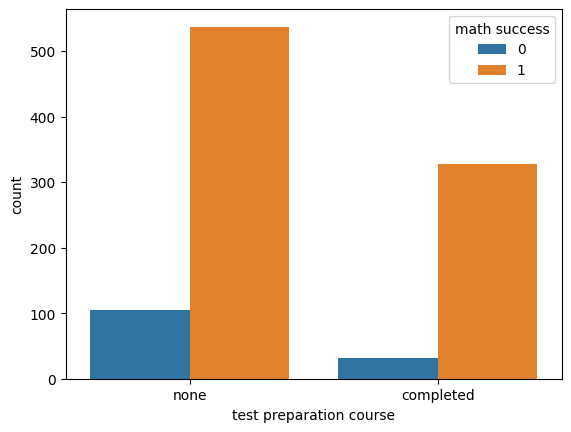

In [ ]:
sns.countplot(x='test preparation course', data = df, hue='math success')

# Машинное обучение

## Предсказание успешной сдачи экзамена по `writing`

**Цель:** попробуем по характеристикам студентов предсказать, сдаст каждый из них экзамен по `writing` или нет.

Вопросы:

* *что такое матрица объект-признак? что такое целевая переменная?*

* *что такое тренировочные и тестовые данные? зачем разбивать все данные на тренировочные и тестовые?*

* *что в нашей задаче будет целевой переменной?*

* *что такое классификация и регрессия? какого типа наша задача?*

Схема машинного обучения:

* есть обучающие данные (с известными ответами) - на них модель учится находить зависимость ответов от признаков объектов

* есть тестовые данные (с неизвестными для модели ответами) - на них мы проверяем качество обученной модели

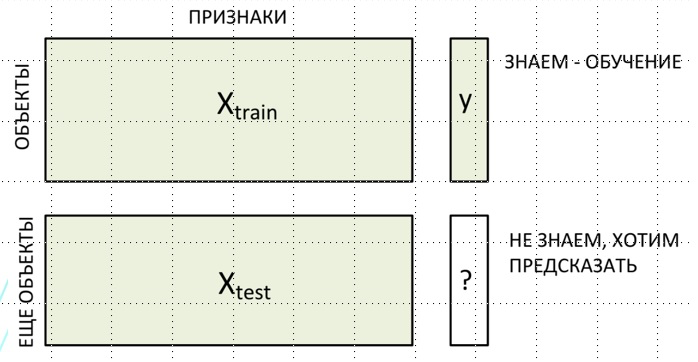

In [ ]:
X = df.drop(['reading success','writing success', 'math success', 'writing score', 'overall success'], axis=1)

y = df['writing success'] # целевая переменная (target)

In [ ]:
X.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,class_group
0,female,NaN,standard,none,72.0,72.0,group B
1,female,some college,standard,completed,69.0,90.0,group C
2,female,master's degree,standard,none,90.0,95.0,group B
3,male,associate's degree,free/reduced,none,47.0,57.0,group A
4,male,some college,standard,none,76.0,78.0,group C


Чтобы применять классические модели машинного обучения, необходимо перевести категориальные (не являющиеся числами и не ведущие себя как числа) признаки в числовые.

Возьмем сейчас только бинарные признаки:
* `lunch`
* `test preparation course`

Одну из категорий заменим на 1, другую на 0.

In [ ]:
X['lunch'] = X['lunch'].map({'standard' : 1, 'free/reduced' : 0})
X['test preparation course'] = X['test preparation course'].map({'completed' : 1, 'none' : 0})

In [ ]:
X.drop(['parental level of education', 'class_group', 'gender'], axis=1, inplace=True)

In [ ]:
X.head()

,lunch,test preparation course,math score,reading score
0,1,0,72.0,72.0
1,1,1,69.0,90.0
2,1,0,90.0,95.0
3,0,0,47.0,57.0
4,1,0,76.0,78.0


In [ ]:
y[:5]

0    1
1    1
2    1
3    0
4    1
Name: writing success, dtype: int64

Разобъем данные на тренировочную и тестовую части

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((750, 4), (250, 4))

Для решения нашей задачи будем использовать линейный классификатор под названием **логистическая регрессия**.

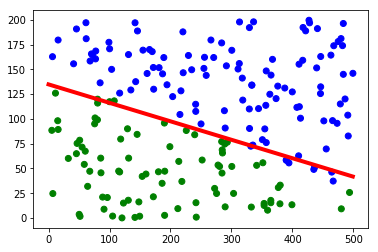

**Логистическая регрессия** - это линейный классификатор, прогноз которого является суммой признаков объектов с некоторыми коэффициентами (весами).

Когда модель предсказывает класс, она делает это по формуле
$$a(x) = sign(w_0 + w_1x_1 + w_2x_2 + ...),$$
то есть умножает признаки объекта $x_1,x_2,...$ на некоторые веса $w_0,w_1,w_2,...$

Например, если
* $x_1$ - `math score`
* $x_2$ - `lunch`,
то обученная модель может иметь вид
$$a(x) = sign(-12 + 1.2\cdot x_1 + 10\cdot x_2)$$

Веса модели подбираются автоматически так, чтобы модель как можно меньше ошибалась.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [ ]:
pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# y_test.value_counts(normalize=True)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[ 27,   6],
       [  4, 213]])

In [ ]:
# len(y_test[y_test == 0]), len(y_test[y_test == 1]), len(pred[pred == 0])

In [ ]:
model.coef_

array([[-0.04442726,  1.30143598,  0.0065041 ,  0.38515394]])

## Что дальше?

На следующем занятии:
* подробнее о том, что происходит при обучении логистической регрессии
* как интерпретировать результат/прогноз модели?
* как повлиять на прогнозы модели (выявить больше не сдавших экзамен)?
* как можно работать с категориальными признаками, у которых больше двух значений?

И начинаем двигаться в сторону сервиса! Обсудим Git и GitHub!

# Курсы сообщества AI Education

**Интенсивы**

---
[Разведочный анализ данных](https://stepik.org/a/177213)

На интенсиве вы познакомитесь с основными и продвинутыми подходами анализа данных:
  * Научитесь исследовать данные при помощи современных библиотек (NumPy, Pandas, Polars, Matplotlib, Seaborn)
  * Обучите свою первую модель машинного обучения
  * Построите интерактивный дашборд при помощи инструмента ExplainerDashboard
  * Начнете использовать такие инструменты разработчика как Git и Docker


[Линейные модели и их презентация](https://stepik.org/a/177215)  

В курсе вы не только разберете теоретическую сторону предмета, но и узнаете как использовать модели на практике:
  * Будете оценивать качество моделей регрессии и классификации
  * Проходить все этапы задачи ML: от разведочного анализа до получения прогноза и его интерпретации
  * Cтроить интерактивные дашборды при помощи библиотеки Streamlit
  * Cоздавать веб-сервисы с использованием фреймворка FastApi


В каждом интенсиве по 9 вебинаров (4 по анализу данных / 4 по разработке / финальный с подведением итогов и защитой проектов по желанию).

**Курсы**

---

[Практический Machine Learning](https://stepik.org/a/125501)

  * Курс посвящен изучению всех основных задач и подходов в машинном обучении. Курс дает как теорию методов, так и обширную практику.
  * За 16 недель курса вы пройдете путь практически с нуля в машинном обучении до уверенного владения основными алгоритмами и подходами.

[Прикладные задачи машинного обучения](https://stepik.org/a/175967)

* В курсе подробно разобраны следующие темы:

  * построение рекомендательных систем
  * анализ временных рядов
  * продвинутые методы интерпретации ML-моделей
  * AutoML

* Курс находится в процессе наполнения, в нем будут появляться новые актуальные и прикладные в ML-темы.